In [110]:
import importlib
import test_extract
import graph
importlib.reload(test_extract)
importlib.reload(graph)
import time
import matplotlib.pyplot as plt

In [92]:
start = time.time()
data = test_extract.Data("./data/CIS_enrollment.csv")
end = time.time()
print(end - start)

1.5620460510253906


# Data model test

In [93]:
len(data.courses),len(data.students)

(3629, 4394)

In [94]:
print(list(data.students.values())[0])

{'id': '321398', 'major': 'Computer Science', 'courses': ['Marketing', 'Linear Algebra for Engineers', 'Differential Equations Engrs', 'Signals and Information', 'Finance', 'Engineering Communications', 'Advanced Digital VLSI', 'Beginning Swim', 'Short Course in MATLAB', 'Advanced Computer Architecture', 'Intro to Microelectronics', 'Intro to Circ Elec & Comp Engr', 'Multivariable Calculus Engrs', 'Physics I: Mechanics & Heat', 'Computer Architecture', 'Lasers and Optoelectronics', 'Intro to Entrep & Engr Enterpr', 'Advanced Computer Architecture', 'Digital VLSI Design', 'Physics II: Electromagnetism', 'Networks', 'Engineering Seminar', 'Basketball', 'Phys III-Osc Waves & Quan Phys', 'Archery', 'Intro to Scientific Comp', 'Complex Digital ASIC Design', 'Obj-Oriented Prog & Data Struc', 'MicroElectro Mechanical System', 'Datacenter Networks & Services', 'Cooperative Workshop MATH 1920', 'Computer Graphics I', 'Fiber & Integrated Optics', 'Intro Computing Using Java', 'Advanced Systems',

In [95]:
print(list(data.courses["CS1110"].students)[0])

{'id': '3446085', 'major': 'Computer Science', 'courses': ['Introduction to Japan', 'Walking Meditation', 'Intro Analysis of Algorithms', 'Calculus For Engineers', 'Linear Algebra for Engineers', 'English Words Hist&Mysteries', 'Digital Logic & Computer Org.', 'The Nature of the Universe', 'Obj-Oriented Prog & Data Struc', 'Multivariable Calculus Engrs', 'Intro Computing Using Java', 'Outdoor Beginning Tennis', 'Discrete Structures', 'Intro Microeconomics'], 'terms': [('CS1110', (2017, 2)), ('MATH1920', (2018, 0)), ('ECON1110', (2018, 2)), ('PE1445', (2017, 2)), ('MATH1910', (2017, 2)), ('ASIAN2211', (2017, 2)), ('MATH2940', (2018, 2)), ('LING1109', (2018, 0)), ('ECE2300', (2018, 2)), ('ASTRO1101', (2018, 2)), ('CS2800', (2018, 0)), ('PE1273', (2018, 0)), ('CS4820', (2018, 2)), ('CS2110', (2018, 0))], 'term_numbers': {'CS1110': 1, 'PE1445': 1, 'MATH1910': 1, 'ASIAN2211': 1, 'MATH1920': 2, 'LING1109': 2, 'CS2800': 2, 'PE1273': 2, 'CS2110': 2, 'ECON1110': 3, 'MATH2940': 3, 'ECE2300': 3, 

# Graph model test

In [111]:
g = graph.Graph()

In [112]:
start = time.time()
c = 1
for cname1 in data.courses:
    if c % 250 == 0:
        print(c)
    for cname2 in data.courses:
        if cname2 == cname1:
            continue
        course = data.courses[cname1]
        count = 0
        for s in course.students:
            if cname2 in s.term_numbers and s.term_numbers[cname2] == s.term_numbers[cname1] + 1:
                count += 1
        if count > 0:
            g.addEdge(cname1, cname2, count)
    c += 1
end = time.time()
print(end - start)

250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
79.11382818222046


In [118]:
for e in g.filterEdges(lambda e: e.weight > 250):
    print(str(e))

(MATH2210,CS2800,265)
(MATH2210,MATH2220,253)
(MATH2940,CS2800,443)
(MATH2940,MATH2930,353)
(MATH2940,CS3110,580)
(MATH2940,ENGRD2700,372)
(MATH2940,CS3410,481)
(MATH2940,CS2850,258)
(ENGRD2110,MATH2940,267)
(ENGRD2110,CS2800,343)
(ENGRD2110,CS3110,282)
(PHYS1112,MATH2940,470)
(PHYS1112,CS2800,416)
(PHYS1112,PHYS2213,533)
(ENGRG1050,MATH2940,757)
(ENGRG1050,ENGRD2110,363)
(ENGRG1050,PHYS1112,423)
(ENGRG1050,PE1300,267)
(ENGRG1050,MATH1920,490)
(ENGRG1050,CHEM2090,334)
(ENGRG1050,CS2800,636)
(ENGRG1050,MATH2930,459)
(ENGRG1050,PHYS2213,423)
(ENGRG1050,CS2110,370)
(INFO2040,INFO2300,252)
(PE1300,CS2800,266)
(MATH1920,MATH2940,1148)
(MATH1920,ENGRD2110,344)
(MATH1920,CHEM2090,253)
(MATH1920,CS2800,822)
(MATH1920,MATH2930,623)
(MATH1920,PHYS2213,753)
(MATH1920,CS2110,381)
(CS1110,MATH2940,442)
(CS1110,ENGRD2110,323)
(CS1110,MATH1920,288)
(CS1110,CS2800,703)
(CS1110,CS2111,331)
(CS1110,PHYS2213,262)
(CS1110,CS2110,1107)
(CHEM2090,MATH2940,325)
(CHEM2090,PHYS1112,339)
(CHEM2090,MATH1920,269)

In [116]:
def export_graph(g, name:str, threshold=0):
    edges = [e for e in g.edges if e.weight >= threshold]
    nodes = set([e.src for e in edges]).intersection(set([e.dest for e in edges]))
    fname = name+".dot"
    with open(fname, "w") as f:
        f.write("digraph course_graph {\n")
        for e in edges:
            f.write('{} -> {} [ label = "{}" ];\n'.format(e.src, e.dest, e.weight))
        for n in nodes:
            f.write('{} [ label = "{}" ];\n'.format(n,n))
        f.write("}\n")
    print("done! exported as {}.dot".format(name))

In [119]:
export_graph(g, "test",250)

done! exported as test.dot


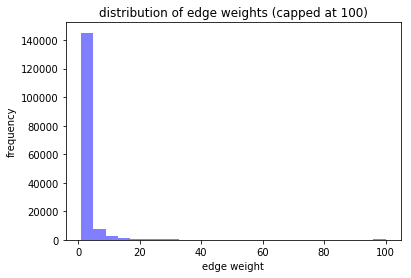

In [120]:
x = [min(e.weight, 100) for e in g.edges]
num_bins = 25
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel("edge weight")
plt.ylabel("frequency")
plt.title("distribution of edge weights (capped at 100)")
plt.show()

In [121]:
len(g.edges)

159731

In [134]:
edges_dict = {}
for e in g.edges:
    edges_dict[(e.src, e.dest)] = e.weight
print(len(edges_dict))

159731


In [135]:
for k in list(edges_dict.keys()):
    k1, k2 = k
    if k in edges_dict and (k2,k1) in edges_dict:
        w1, w2 = edges_dict[k], edges_dict[(k2, k1)]
        if w1/w2 > 4:
            del edges_dict[(k2, k1)]
        elif w2/w1 > 4:
            del edges_dict[k]
print(len(edges_dict))

156744


In [139]:
for k in list(edges_dict.keys()):
    if edges_dict[k] < 5:
        del edges_dict[k]
print(len(edges_dict))    

14225


In [141]:
n = set()
for k in list(edges_dict.keys()):
    n.add(k[0])
    n.add(k[1])
print(len(n))

922


In [142]:
len(g.nodes)

3625

In [146]:
def export_edges(edges, name:str):
    nodes = set([e.src for e in edges]).intersection(set([e.dest for e in edges]))
    fname = name+".dot"
    with open(fname, "w") as f:
        f.write("digraph course_graph {\n")
        for e in edges:
            f.write('{} -> {} [ label = "{}" ];\n'.format(e.src, e.dest, e.weight))
        for n in nodes:
            f.write('{} [ label = "{}" ];\n'.format(n,n))
        f.write("}\n")
    print("done! exported as {}.dot".format(name))

In [149]:
new_edges = [e for e in g.edges if (e.src, e.dest) in edges_dict and e.weight > 250]
export_edges(new_edges, "test2")

done! exported as test2.dot
